Oleh Fajar Kurnia

# Persiapan Data

## Transformasi Data

In [1]:
import torch
import re
import pandas as pd
from transformers import AutoModel, AutoTokenizer, pipeline
import datetime as dt

In [2]:
df = pd.read_csv("../data/GOTY_Steam_reviews_english, 100k, latest 28-04-2025.csv")
df2 = pd.read_csv("../data/GOTY_Steam_reviews_english_witcher_baldur.csv")

# Filter out old data from The Witcher 3 and Baldur's Gate
df = df[~df['game'].isin(["Baldur's Gate 3", "The Witcher 3: Wild Hunt"])]

# Merge df with df2 (which contain latest Witcher 3 and Baldur Gate Data)
df = pd.concat([df, df2], ignore_index=True)

In [3]:
# df = pd.read_csv("../data/GOTY_Steam_reviews_english_sample.csv")
df.head()


,timestamp_created,game,review,voted_up,weighted_vote_score,language,author
0,1592261503,Dragon Age: Inquisition,I found a particular mod absolutely essential:...,True,0.960588,english,"{'steamid': '76561197998282606', 'num_games_ow..."
1,1682220637,Dragon Age: Inquisition,"EA Launcher has completely broken this game, S...",False,0.944942,english,"{'steamid': '76561198007277283', 'num_games_ow..."
2,1608014450,Dragon Age: Inquisition,I love this game. I've clocked over 300 hours ...,False,0.919890,english,"{'steamid': '76561197977249754', 'num_games_ow..."
3,1606346717,Dragon Age: Inquisition,Great game with a great story and visuals...\n...,True,0.916374,english,"{'steamid': '76561198202036901', 'num_games_ow..."
4,1653398832,Dragon Age: Inquisition,Origin stops me from opening the game.\nThe on...,False,0.908808,english,"{'steamid': '76561198110956086', 'num_games_ow..."


In [4]:
# Add year column by game release date
## Game titles and corresponding years
game_year_mapping = {
    "The Witcher 3: Wild Hunt": 2015,
    "Baldur's Gate 3": 2023,
    "Sekiro: Shadows Die Twice": 2019,
    "God of War": 2018,
    "Elden Ring": 2022,
    "It Takes Two": 2021,
    "Dragon Age: Inquisition": 2014,
    "The Last of Us Part II": 2020
}

# Adding the 'release_year' column to the existing df based on the 'game' column
df['release_year'] = df['game'].map(game_year_mapping)

# convert to date format
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

# Extract year and month
df['reviews_year'] = df['timestamp_created'].dt.year
df['reviews_month'] = df['timestamp_created'].dt.month
df['reviews_day'] = df['timestamp_created'].dt.day

df.head()

,timestamp_created,game,review,voted_up,weighted_vote_score,language,author,release_year,reviews_year,reviews_month,reviews_day
0,2020-06-15 22:51:43,Dragon Age: Inquisition,I found a particular mod absolutely essential:...,True,0.960588,english,"{'steamid': '76561197998282606', 'num_games_ow...",2014,2020,6,15
1,2023-04-23 03:30:37,Dragon Age: Inquisition,"EA Launcher has completely broken this game, S...",False,0.944942,english,"{'steamid': '76561198007277283', 'num_games_ow...",2014,2023,4,23
2,2020-12-15 06:40:50,Dragon Age: Inquisition,I love this game. I've clocked over 300 hours ...,False,0.919890,english,"{'steamid': '76561197977249754', 'num_games_ow...",2014,2020,12,15
3,2020-11-25 23:25:17,Dragon Age: Inquisition,Great game with a great story and visuals...\n...,True,0.916374,english,"{'steamid': '76561198202036901', 'num_games_ow...",2014,2020,11,25
4,2022-05-24 13:27:12,Dragon Age: Inquisition,Origin stops me from opening the game.\nThe on...,False,0.908808,english,"{'steamid': '76561198110956086', 'num_games_ow...",2014,2022,5,24


## Pembersihan Data

In [5]:
# Check data shape, and info
def dataset_info():
    print(f'--------------------------------------|||||||||||||-------------------------------------- \n')
    print(f'Dataset shape : {df.shape} \n')
    print(f'--------------------------------------|||||||||||||-------------------------------------- \n')
    print(f'{df.info()}\n')
    print(f'--------------------------------------|||||||||||||-------------------------------------- \n')
    print(f"Game List:\n{df['game'].value_counts()}\n")
    print(f'--------------------------------------|||||||||||||-------------------------------------- \n')
dataset_info()

--------------------------------------|||||||||||||-------------------------------------- 

Dataset shape : (656189, 11) 

--------------------------------------|||||||||||||-------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656189 entries, 0 to 656188
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp_created    656189 non-null  datetime64[ns]
 1   game                 656189 non-null  object        
 2   review               654666 non-null  object        
 3   voted_up             656189 non-null  bool          
 4   weighted_vote_score  656189 non-null  float64       
 5   language             656189 non-null  object        
 6   author               656189 non-null  object        
 7   release_year         656189 non-null  int64         
 8   reviews_year         656189 non-null  int32         
 9   reviews_month        656189 non

In [6]:
# Check for missing value / null
print(f"Missing Value Check \n{df.isnull().sum()} \n")
print(f"What game that have missing value :\n{df[df.isnull().any(axis=1)]['game'].value_counts()} \n ")
print(f"data shape : {df.shape}\n")

# Drop the missing value
df = df.dropna()

# Check for missing value / null
print(f"Missing Value Check \n{df.isnull().sum()} \n")
print(f"What game that have missing value :\n{df[df.isnull().any(axis=1)]['game'].value_counts()} \n ")
print(f"data shape : {df.shape}\n")

Missing Value Check 
timestamp_created         0
game                      0
review                 1523
voted_up                  0
weighted_vote_score       0
language                  0
author                    0
release_year              0
reviews_year              0
reviews_month             0
reviews_day               0
dtype: int64 

What game that have missing value :
game
The Witcher 3: Wild Hunt     696
God of War                   329
Sekiro: Shadows Die Twice    246
It Takes Two                 160
Dragon Age: Inquisition       55
The Last of Us Part II        33
Baldur's Gate 3                3
Elden Ring                     1
Name: count, dtype: int64 
 
data shape : (656189, 11)

Missing Value Check 
timestamp_created      0
game                   0
review                 0
voted_up               0
weighted_vote_score    0
language               0
author                 0
release_year           0
reviews_year           0
reviews_month          0
reviews_day            0

## Pra-pemrosesan Data

In [7]:
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/fajar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    # stop_words = set(stopwords.words('english'))  # You can change the language here if needed
    # text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [9]:
# Load BERT Models & Check system (is it support for cuda)
# Load sentiment analysis pipeline using the `nlptown/bert-base-multilingual-uncased-sentiment` model
sentiment_pipeline = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Check the device being used (GPU or CPU)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Device set to use cuda:0


CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce GTX 1060 6GB


In [10]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd

# Load the model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check if CUDA is available
model = BertForSequenceClassification.from_pretrained(model_name).to(device)  # Move the model to the correct device

print(f"Device used : {device}")

Device used : cuda


# Analisis

In [11]:
# Function to tokenize with BERT, selecting overlapping segments
def tokenize_with_bert(text, max_tokens=512):
    tokenized_text = tokenizer.tokenize(text)
    
    # If text is within the limit, return as is
    if len(tokenized_text) <= max_tokens:
        return text

    # Segment the review with more overlapping tokens
    segment_size = max_tokens // 4  # Using 4 segments instead of 3
    selected_tokens = (
        tokenized_text[:segment_size] + 
        tokenized_text[len(tokenized_text)//4: len(tokenized_text)//4 + segment_size] +
        tokenized_text[len(tokenized_text)//2: len(tokenized_text)//2 + segment_size] + 
        tokenized_text[-segment_size:]
    )
    
    # Convert back to text
    selected_text = tokenizer.convert_tokens_to_string(selected_tokens)
    return selected_text

# Function to analyze sentiment and binarize into Positive and Negative
def analyze_sentiment_and_keep_context(text, chunk_size=512):
    # Clean the review text
    cleaned_text = clean_text(text)

    # Tokenize and process the review
    processed_review = tokenize_with_bert(cleaned_text, max_tokens=chunk_size)
    
    # Tokenize the processed review for sentiment analysis
    inputs = tokenizer(processed_review, return_tensors="pt", padding=True, truncation=True, max_length=chunk_size).to(device)

    # Forward pass through the model
    with torch.no_grad():
        logits = model(**inputs).logits

    # Get the predicted sentiment label (0: Very Negative, 1: Negative, 2: Neutral, 3: Positive, 4: Very Positive)
    sentiment_label = torch.argmax(logits, dim=1).item()
    
    # Binarize sentiment: Map to "Negative" if sentiment is 0, 1, or 2; "Positive" if sentiment is 3 or 4
    if sentiment_label in [0, 1]:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Positive"
    
    return sentiment_label, processed_review

## Inferensi BERT

In [12]:
%%time

from tqdm import tqdm
tqdm.pandas()  # Enables tqdm for pandas apply

# Apply the function to each review in the dataframe
df[['sentiment', 'processed_review']] = df['review'].progress_apply(lambda x: pd.Series(analyze_sentiment_and_keep_context(x)))

# Display the updated dataframe with sentiment labels and processed reviews
df.to_csv('../output/bert-result.csv')
df.head()

100%|██████████| 654666/654666 [2:26:26<00:00, 74.51it/s]  


CPU times: user 2h 25min 31s, sys: 1min 13s, total: 2h 26min 45s
Wall time: 2h 26min 38s


,timestamp_created,game,review,voted_up,weighted_vote_score,language,author,release_year,reviews_year,reviews_month,reviews_day,sentiment,processed_review
0,2020-06-15 22:51:43,Dragon Age: Inquisition,I found a particular mod absolutely essential:...,True,0.960588,english,"{'steamid': '76561197998282606', 'num_games_ow...",2014,2020,6,15,Positive,i found a particular mod absolutely essential ...
1,2023-04-23 03:30:37,Dragon Age: Inquisition,"EA Launcher has completely broken this game, S...",False,0.944942,english,"{'steamid': '76561198007277283', 'num_games_ow...",2014,2023,4,23,Negative,ea launcher has completely broken this game st...
2,2020-12-15 06:40:50,Dragon Age: Inquisition,I love this game. I've clocked over 300 hours ...,False,0.919890,english,"{'steamid': '76561197977249754', 'num_games_ow...",2014,2020,12,15,Negative,i love this game ive clocked over hours in it ...
3,2020-11-25 23:25:17,Dragon Age: Inquisition,Great game with a great story and visuals...\n...,True,0.916374,english,"{'steamid': '76561198202036901', 'num_games_ow...",2014,2020,11,25,Positive,great game with a great story and visuals but ...
4,2022-05-24 13:27:12,Dragon Age: Inquisition,Origin stops me from opening the game.\nThe on...,False,0.908808,english,"{'steamid': '76561198110956086', 'num_games_ow...",2014,2022,5,24,Negative,origin stops me from opening the game the only...


## Evaluasi

In [13]:
df = pd.read_csv('../output/bert-result.csv')

In [14]:
# Convert timestamp to datetime
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])

#Filter the DataFrame to exclude 'Baldur's Gate 3' in 'game' column and dates < '2023-08-03'
df = df[~((df['game'] == "Baldur's Gate 3") & (df['timestamp_created'] < '2023-08-03'))]

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Ground truth: True -> 1 (positive), False -> 0 (negative)
y_true = df['voted_up'].astype(int)

# BERT prediction: 'Positive' -> 1, 'Negative' -> 0
y_pred = df['sentiment'].map({'Positive': 1, 'Negative': 0})

In [16]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.892285462997864
Precision: 0.9879052875972284
Recall: 0.8983177828052068
F1-score: 0.9409840241075408
Confusion Matrix:
 [[ 21365   6694]
 [ 61890 546771]]


In [17]:
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.26      0.76      0.38     28059
    Positive       0.99      0.90      0.94    608661

    accuracy                           0.89    636720
   macro avg       0.62      0.83      0.66    636720
weighted avg       0.96      0.89      0.92    636720



In [18]:
df['game'].value_counts()

game
The Witcher 3: Wild Hunt     237846
Baldur's Gate 3              114851
Sekiro: Shadows Die Twice     90295
God of War                    70874
Elden Ring                    56698
It Takes Two                  48729
Dragon Age: Inquisition       10858
The Last of Us Part II         6569
Name: count, dtype: int64

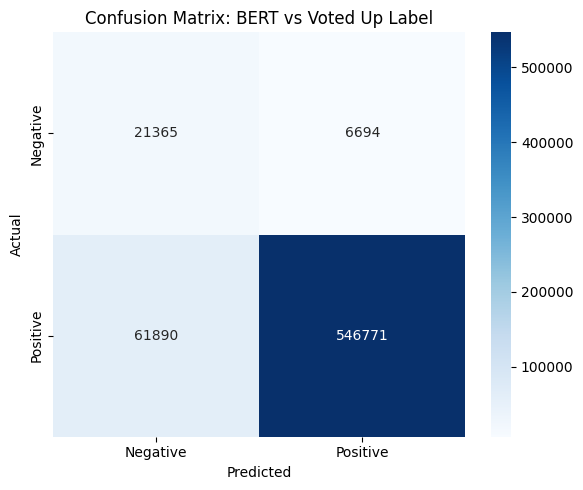

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: BERT vs Voted Up Label')
plt.tight_layout()
plt.show()

## Penandaan Manual

In [20]:
# Stopword Cleaning
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def cleaned_reviews(text, extra_stopwords=None):
    if extra_stopwords is None:
        extra_stopwords = set()

    # Combine NLTK stopwords with your custom ones
    stop_words = set(stopwords.words('english')).union(extra_stopwords)

    # Lowercase
    text = str(text).lower()

    # Remove URLs, punctuation, numbers, and extra spaces
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords and lemmatize
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
    
    return text

[nltk_data] Downloading package stopwords to /home/fajar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fajar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
%%time
# Define custom/game-related stopwords
custom_stopwords = {'sekiro', 'elden', 'ring', 'witcher', 'game', 'games','play','played','one','get','pc','much'}

# Clean the reviews
df['cleaned_review'] = df['review'].apply(lambda x: cleaned_reviews(x, extra_stopwords=custom_stopwords))

CPU times: user 1min 47s, sys: 6.48 s, total: 1min 54s
Wall time: 1min 53s


In [22]:
from collections import Counter
from itertools import combinations

# Get word co-occurrence around known aspect words
def get_cooccurring_words(df, keywords, window=5):
    cooccur = Counter()
    for text in df['cleaned_review']:
        tokens = text.split()
        for i, word in enumerate(tokens):
            if word in keywords:
                start = max(0, i - window)
                end = min(len(tokens), i + window + 1)
                context = tokens[start:end]
                cooccur.update([w for w in context if w != word])
    return cooccur.most_common(20)

# Example looking for Gameplay Aspect
get_cooccurring_words(df, ['gameplay'])

[('story', 14775),
 ('good', 11913),
 ('great', 7794),
 ('graphic', 5419),
 ('amazing', 4971),
 ('fun', 4491),
 ('character', 4083),
 ('hour', 3983),
 ('long', 3561),
 ('world', 3365),
 ('like', 3246),
 ('mehh', 3110),
 ('best', 3097),
 ('combat', 3021),
 ('watch', 2996),
 ('mechanic', 2891),
 ('dont', 2871),
 ('really', 2774),
 ('msdos', 2771),
 ('time', 2441)]

In [23]:
aspect_keywords = {
    'Graphics': ['graphics', 'visuals', 'animation', 'design', 'art', 'look', 'environment', 'lighting','beautiful','stunning','masterpiece','look','wonderful','graphic','design'],
    'Story': ['story', 'plot', 'narrative', 'dialogue', 'writing', 'lore', 'ending', 'cutscene', 'cinematic','great','gameplay','amazing','character','best','lore','quest','telling'],
    'Combat': ['combat','block','smashed', 'fight', 'battles', 'parry', 'boss', 'enemy', 'weapon', 'slash', 'attack', 'swordplay','system','soul','satisfying','tactical'],
    'Difficulty': ['difficulty', 'hard', 'challenging', 'easy', 'frustrating', 'die', 'punishing', 'trial', 'rage', 'gitgud','level','soulsborne','soul','boss','tough','top'],
    'Music/Sound': ['music', 'sound', 'audio', 'voice', 'soundtrack', 'bgm', 'effects', 'ambience','voice','heard','effect','boy'],
    'Performance': ['fps', 'lag', 'crash', 'bug', 'performance', 'optimization', 'stutter', 'frame drop','issue','run','experience','enjoyable','stuttering','poor'],
    'Gameplay': ['gameplay', 'mechanic', 'feature', 'control', 'movement', 'explore', 'freedom', 'replayability','good','mechanic','love','rpg','fun']
}

In [24]:
%%time
#Extract the aspect from dataset

def extract_aspects(text, aspect_dict):
    found_aspects = []
    text = text.lower()
    for aspect, keywords in aspect_dict.items():
        if any(kw in text for kw in keywords):
            found_aspects.append(aspect)
    return found_aspects if found_aspects else ['Other']

df['aspects'] = df['cleaned_review'].apply(lambda x: extract_aspects(x, aspect_keywords))

CPU times: user 9.61 s, sys: 53.1 ms, total: 9.66 s
Wall time: 9.59 s


In [25]:
# Explode aspects column into multiple rows per game
aspect_counts = df.explode('aspects').groupby(['game', 'aspects']).size().reset_index(name='count')

aspect_counts

,game,aspects,count
0,Baldur's Gate 3,Combat,23447
1,Baldur's Gate 3,Difficulty,27041
2,Baldur's Gate 3,Gameplay,71419
3,Baldur's Gate 3,Graphics,41990
4,Baldur's Gate 3,Music/Sound,15111
...,...,...,...
59,The Witcher 3: Wild Hunt,Graphics,48213
60,The Witcher 3: Wild Hunt,Music/Sound,12824
61,The Witcher 3: Wild Hunt,Other,76831
62,The Witcher 3: Wild Hunt,Performance,21669


# Visualisasi

## Sentimen Pemain

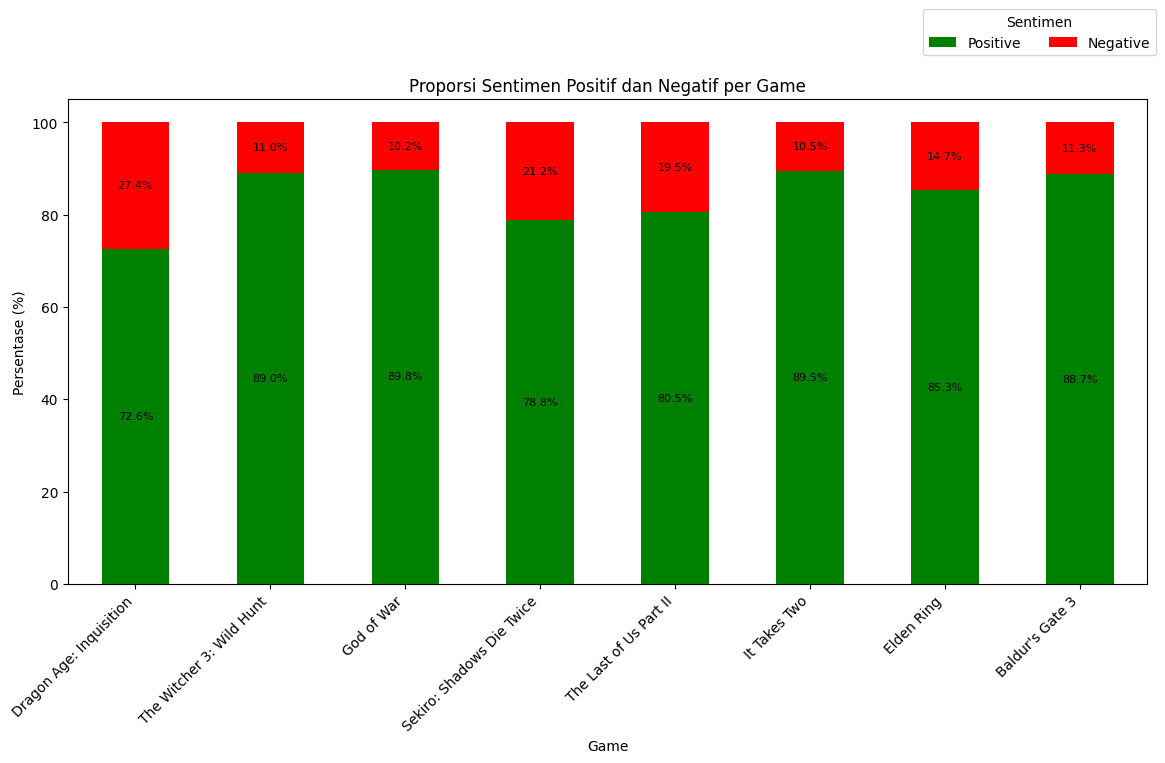

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate each sentimen
sentiment_counts = df.groupby(['game', 'sentiment']).size().reset_index(name='count')

# total count
total_counts = sentiment_counts.groupby('game')['count'].transform('sum')

# calculate each sentiment percentage
sentiment_counts['percentage'] = sentiment_counts['count'] / total_counts * 100

# Pivot data for stacked bar chart
stacked_data = sentiment_counts.pivot(index='game', columns='sentiment', values='percentage').fillna(0)

# sentiment order
if 'Positive' in stacked_data.columns and 'Negative' in stacked_data.columns:
    stacked_data = stacked_data[['Positive', 'Negative']]

# Game order
game_list = [
    "Dragon Age: Inquisition",
    "The Witcher 3: Wild Hunt",
    "God of War",
    "Sekiro: Shadows Die Twice",
    "The Last of Us Part II",
    "It Takes Two",
    "Elden Ring",
    "Baldur's Gate 3"
]


stacked_data_ordered = stacked_data.reindex(game_list)

# Warna khusus untuk sentimen
color_map = {'Positive': 'green', 'Negative': 'red'}

# stacked bar chart
ax = stacked_data_ordered.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=[color_map.get(col, 'gray') for col in stacked_data.columns],
    grid=False
)

# Percentage label in the chart
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            p.get_y() + height / 2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            fontsize=8
        )

plt.title('Proporsi Sentimen Positif dan Negatif per Game')
plt.xlabel('Game')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentimen', loc='upper center', bbox_to_anchor=(0.9, 1.2), ncol=2)
plt.tight_layout()
plt.show()

## Tren Sentimen

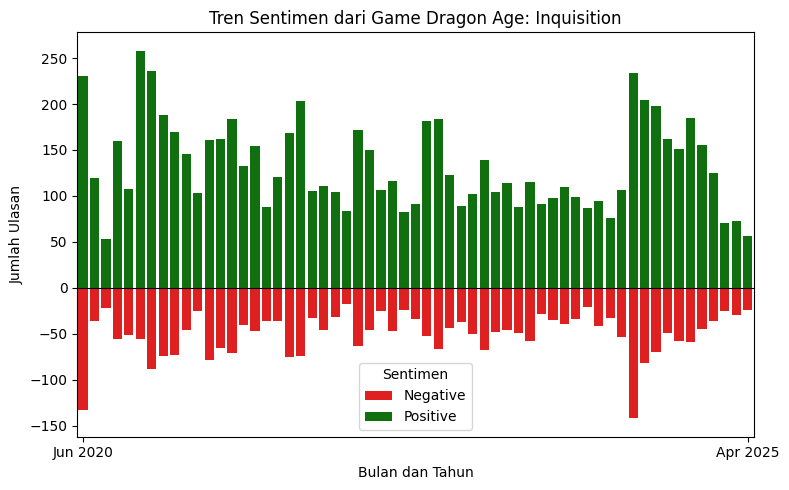

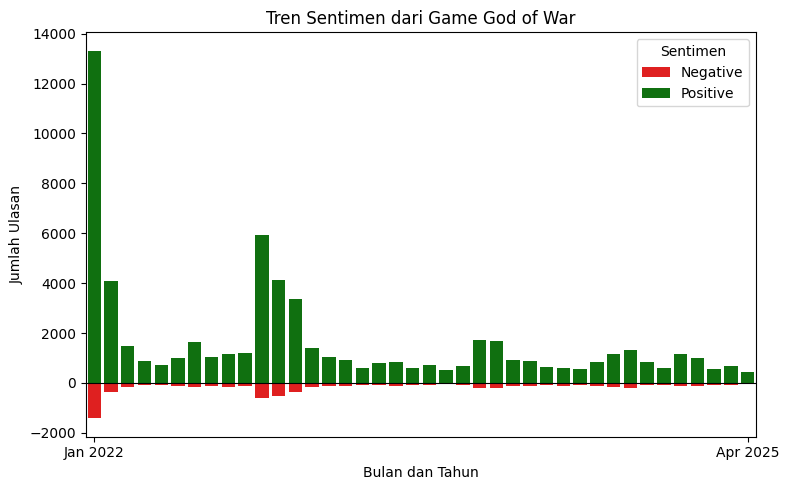

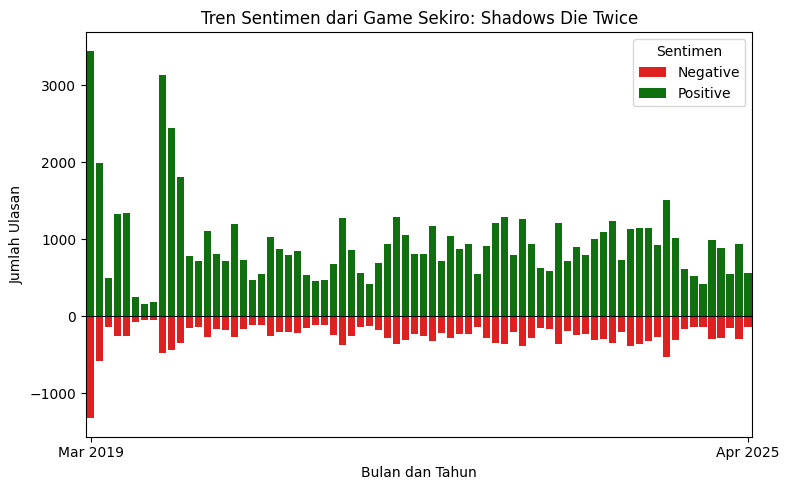

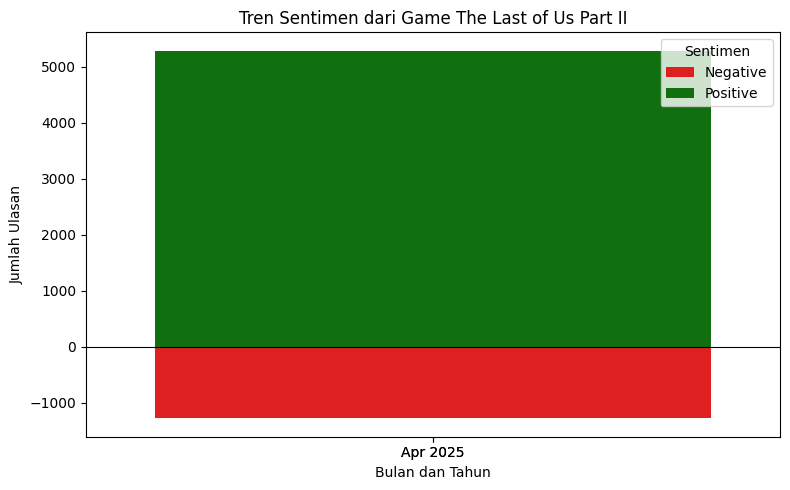

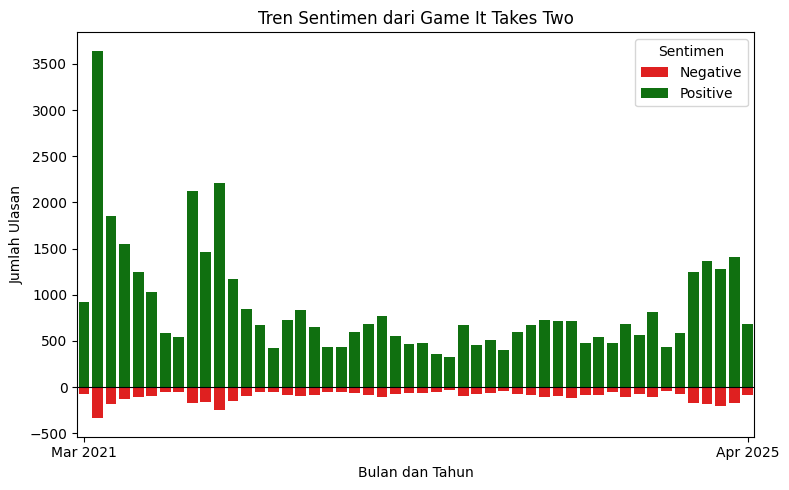

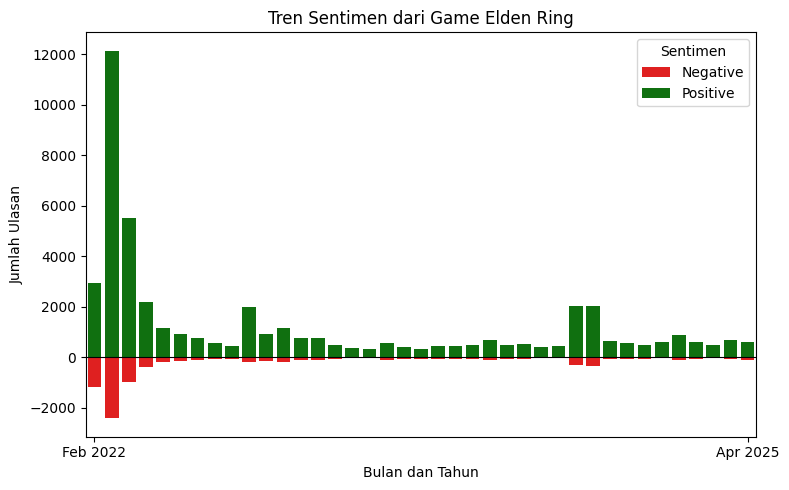

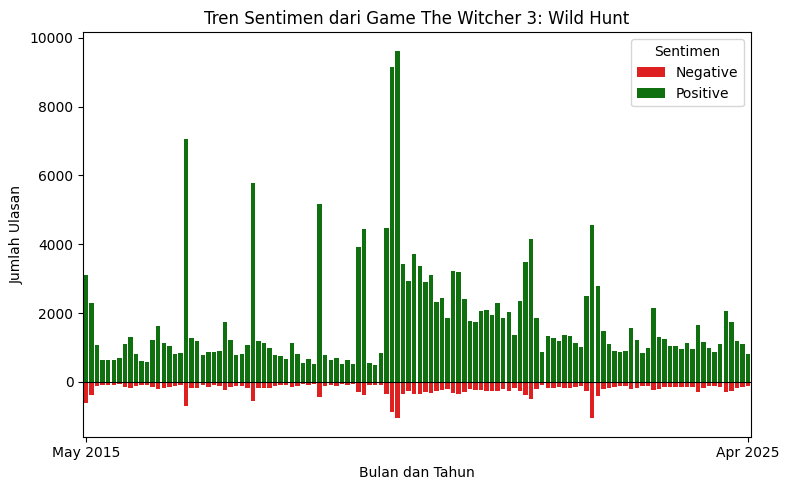

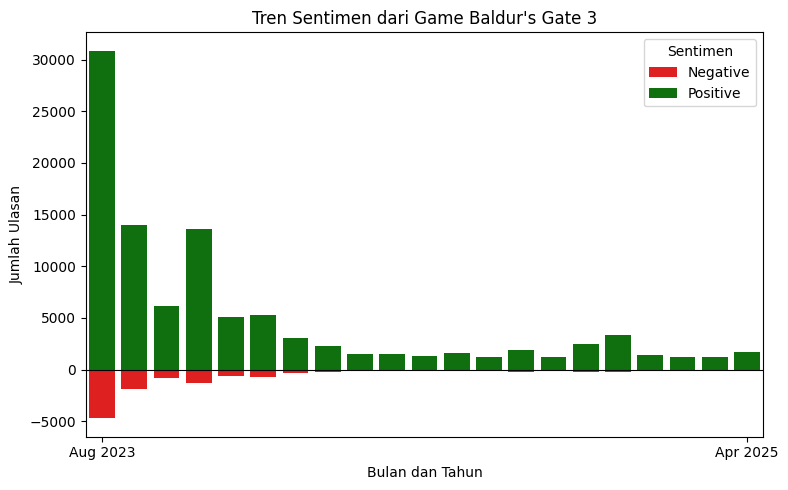

In [27]:
# Pastikan 'review_month' dalam bentuk datetime agar bisa diurutkan
df['review_month_dt'] = df['timestamp_created'].dt.to_period('M').dt.to_timestamp()
df['review_month_str'] = df['review_month_dt'].dt.strftime('%b %Y')  # format tampilan

# Hitung jumlah sentimen bulanan berdasarkan datetime
monthly_sentiment = (
    df.groupby(['game', 'review_month_dt', 'review_month_str', 'sentiment'])
    .size()
    .reset_index(name='count')
)

# Tambahkan kolom nilai signed
monthly_sentiment['signed_count'] = monthly_sentiment.apply(
    lambda row: row['count'] if row['sentiment'] == 'Positive' else -row['count'], axis=1
)

# Dapatkan daftar game unik
games = df['game'].unique()

# Plot satu per satu, urut berdasarkan tanggal
for game in games:
    game_data = monthly_sentiment[monthly_sentiment['game'] == game].copy()
    if game_data.empty:
        continue

    game_data = game_data.sort_values('review_month_dt')

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=game_data,
        x='review_month_str',
        y='signed_count',
        hue='sentiment',
        palette={'Positive': 'green', 'Negative': 'red'},
        dodge=False
    )

    # Tentukan posisi label hanya di awal dan akhir
    xticks = [0, len(game_data['review_month_str'].unique()) - 1]
    xticklabels = [
        game_data['review_month_str'].unique()[0],
        game_data['review_month_str'].unique()[-1]
    ]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    plt.title(f'Tren Sentimen dari Game {game}')
    plt.xlabel('Bulan dan Tahun')
    plt.ylabel('Jumlah Ulasan')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.legend(title='Sentimen')
    plt.tight_layout()
    plt.show()

## Aspek Dominan

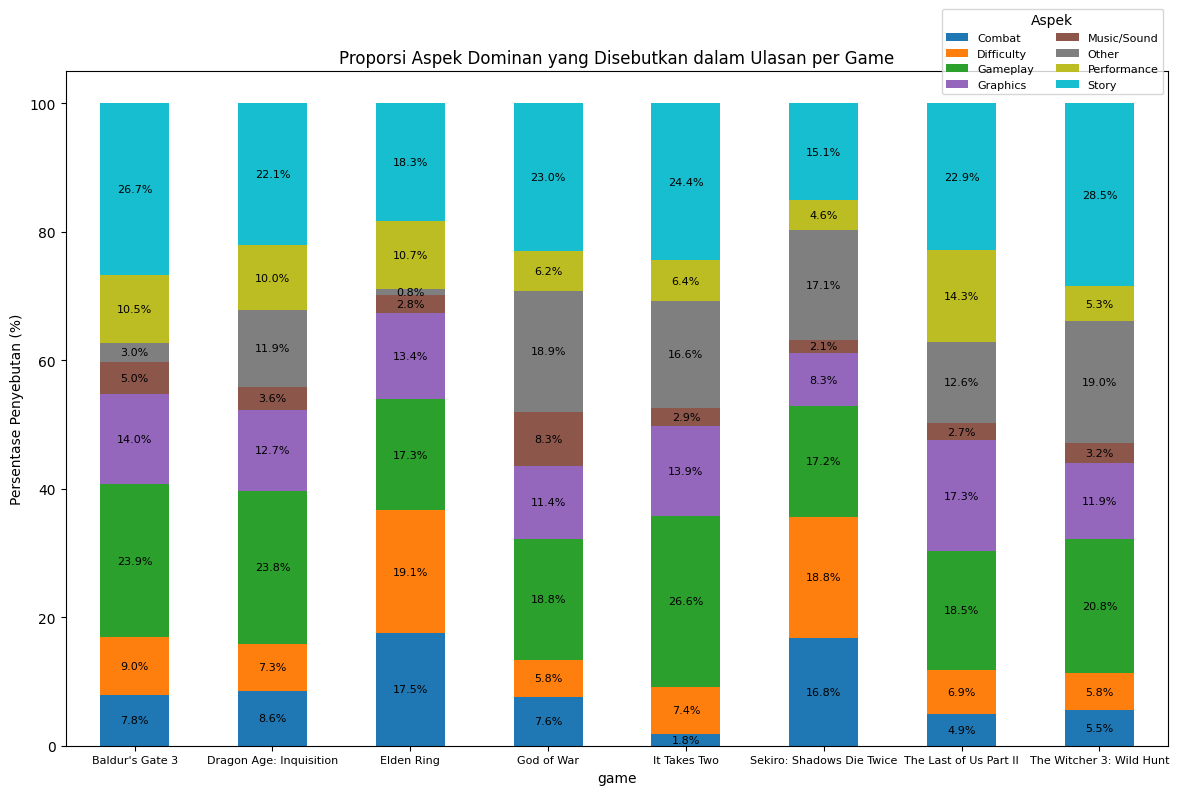

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
top_aspects = aspect_counts.copy()

# Calculate the proportions for each aspect per game
total_mentions = top_aspects.groupby('game')['count'].transform('sum')
top_aspects['percentage'] = (top_aspects['count'] / total_mentions) * 100

# Pivot data for stacked bar plot
stacked_data = top_aspects.pivot_table(index='game', columns='aspects', values='percentage', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')

# Add percentage labels on top of each segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add label if the segment has height
        ax.text(p.get_x() + p.get_width() / 2., p.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

# Style
plt.title('Proporsi Aspek Dominan yang Disebutkan dalam Ulasan per Game')
plt.ylabel('Persentase Penyebutan (%)')
plt.xticks(rotation=0, fontsize=8)
plt.legend(title='Aspek', loc='upper right', bbox_to_anchor=(1, 1.1), ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

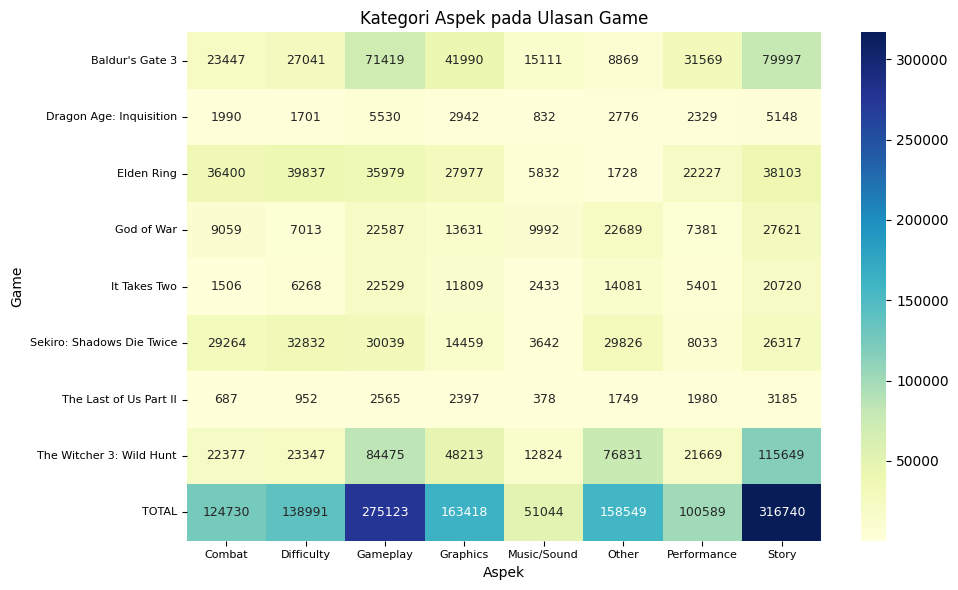

In [29]:
# Buat ulang aspect_matrix
aspect_matrix = aspect_counts.pivot(index='game', columns='aspects', values='count').fillna(0)

# Tambahkan baris TOTAL di bagian bawah
aspect_matrix_with_total = aspect_matrix.copy()
aspect_matrix_with_total.loc['TOTAL'] = aspect_matrix_with_total.sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    aspect_matrix_with_total,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    annot_kws={"size": 9}
)

plt.title('Kategori Aspek pada Ulasan Game')
plt.xlabel('Aspek')
plt.ylabel('Game')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Aspek Pada Sentimen Positif

In [30]:
# Positive only aspect
aspect_counts_positive = df[df['sentiment'] == 'Positive'].explode('aspects').groupby(['game', 'aspects']).size().reset_index(name='count')
aspect_counts_positive.to_csv('../output/aspect_counts_positive.csv')
aspect_counts_positive

,game,aspects,count
0,Baldur's Gate 3,Combat,20558
1,Baldur's Gate 3,Difficulty,23325
2,Baldur's Gate 3,Gameplay,65351
3,Baldur's Gate 3,Graphics,37304
4,Baldur's Gate 3,Music/Sound,13661
...,...,...,...
59,The Witcher 3: Wild Hunt,Graphics,43687
60,The Witcher 3: Wild Hunt,Music/Sound,11420
61,The Witcher 3: Wild Hunt,Other,62042
62,The Witcher 3: Wild Hunt,Performance,18038


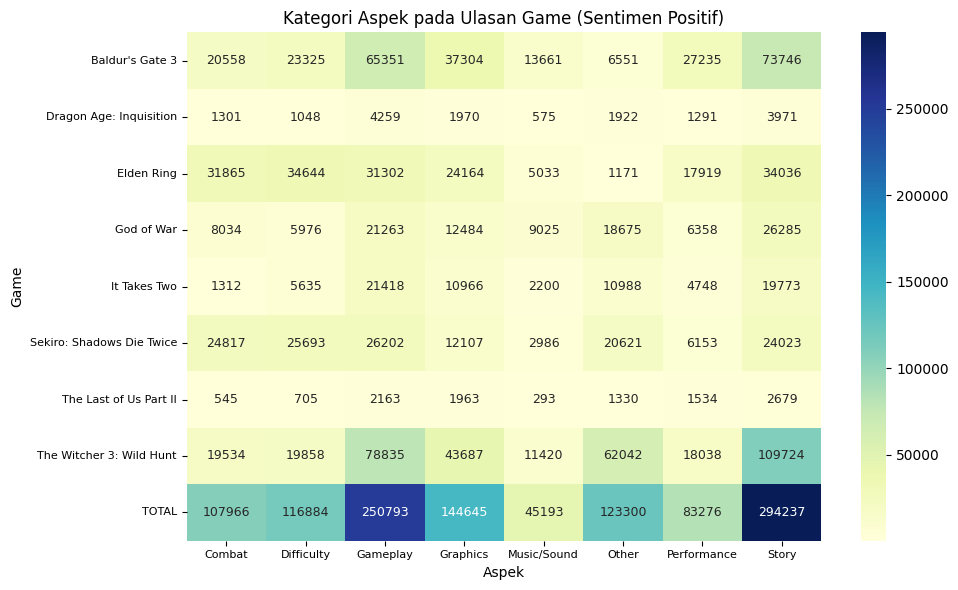

In [31]:
# Buat ulang aspect_matrix
aspect_matrix_pos = aspect_counts_positive.pivot(index='game', columns='aspects', values='count').fillna(0)

# Tambahkan baris TOTAL di bagian bawah
aspect_matrix_with_total_pos = aspect_matrix_pos.copy()
aspect_matrix_with_total_pos.loc['TOTAL'] = aspect_matrix_with_total_pos.sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    aspect_matrix_with_total_pos,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    annot_kws={"size": 9}
)

plt.title('Kategori Aspek pada Ulasan Game (Sentimen Positif)')
plt.xlabel('Aspek')
plt.ylabel('Game')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Aspek Pada Sentimen Negative

In [32]:
# Negative only aspect
aspect_counts_negative = df[df['sentiment'] == 'Negative'].explode('aspects').groupby(['game', 'aspects']).size().reset_index(name='count')
aspect_counts_negative.to_csv('../output/aspect_counts_negative.csv')
aspect_counts_negative

,game,aspects,count
0,Baldur's Gate 3,Combat,2889
1,Baldur's Gate 3,Difficulty,3716
2,Baldur's Gate 3,Gameplay,6068
3,Baldur's Gate 3,Graphics,4686
4,Baldur's Gate 3,Music/Sound,1450
...,...,...,...
59,The Witcher 3: Wild Hunt,Graphics,4526
60,The Witcher 3: Wild Hunt,Music/Sound,1404
61,The Witcher 3: Wild Hunt,Other,14789
62,The Witcher 3: Wild Hunt,Performance,3631


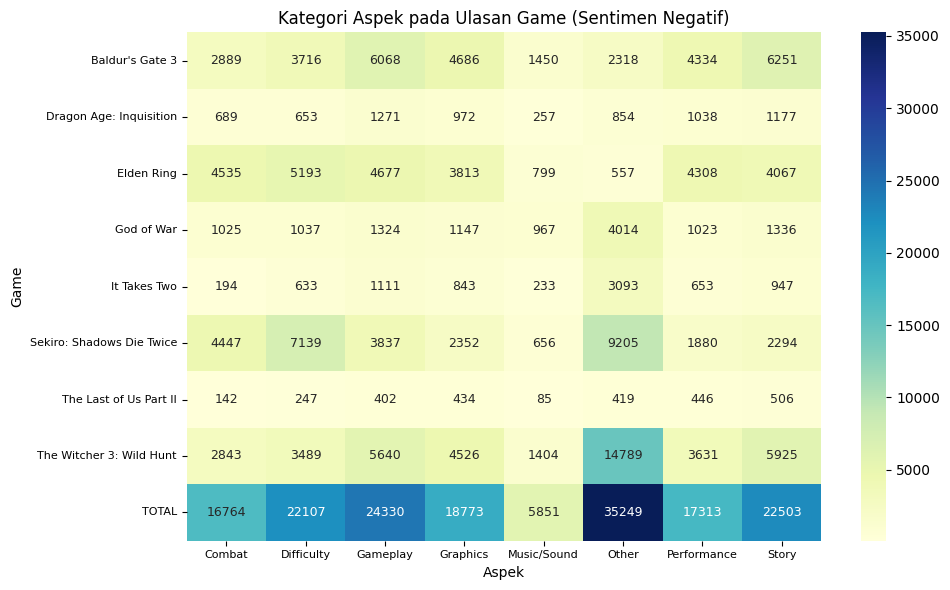

In [33]:
# Buat ulang aspect_matrix
aspect_matrix_neg = aspect_counts_negative.pivot(index='game', columns='aspects', values='count').fillna(0)

# Tambahkan baris TOTAL di bagian bawah
aspect_matrix_with_total_neg = aspect_matrix_neg.copy()
aspect_matrix_with_total_neg.loc['TOTAL'] = aspect_matrix_with_total_neg.sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    aspect_matrix_with_total_neg,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    annot_kws={"size": 9}
)

plt.title('Kategori Aspek pada Ulasan Game (Sentimen Negatif)')
plt.xlabel('Aspek')
plt.ylabel('Game')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()